6. Object detection using Transfer Learning of CNN architectures

a. Load in a pre-trained CNN model trained on a large dataset
b. Freeze parameters (weights) in model’s lower convolutional layers
c. Add custom classifier with several layers of trainable parameters to model
d. Train classifier layers on training data available for task
e. Fine-tune hyper parameters and unfreeze more layers as needed

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

Pre processing img data

In [8]:
dataset_dir = "LP-IV-datasets/ObjectDetection_Ass6/caltech-101-img"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


Selecting first batch containing 2000 images as train and second batch containing 2000 images as test data

In [9]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


a. Load in a pre-trained CNN model trained on a large dataset

In [11]:
# Load VGG16 without top layers
weights_path = "LP-IV-datasets/ObjectDetection_Ass6/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

b. Freeze parameters (weights) in model’s lower convolutional layers

In [12]:
for layer in base_model.layers:
   layer.trainable = False

c. Add custom classifier with several layers of trainable parameters to model

In [13]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

d. Train classifier layers on training data available for task

In [14]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 54s 2s/step - loss: 3.9275 - accuracy: 0.1925 - val_loss: 3.4137 - val_accuracy: 0.3070
Epoch 2/10
32/32 [==============================] - 50s 2s/step - loss: 3.0175 - accuracy: 0.3635 - val_loss: 2.9754 - val_accuracy: 0.4010
Epoch 3/10
32/32 [==============================] - 50s 2s/step - loss: 2.4922 - accuracy: 0.4655 - val_loss: 2.6411 - val_accuracy: 0.4410
Epoch 4/10
32/32 [==============================] - 50s 2s/step - loss: 2.0801 - accuracy: 0.5425 - val_loss: 2.4430 - val_accuracy: 0.4710
Epoch 5/10
32/32 [==============================] - 49s 2s/step - loss: 1.7918 - accuracy: 0.6125 - val_loss: 2.2426 - val_accuracy: 0.5105
Epoch 6/10
32/32 [==============================] - 46s 1s/step - loss: 1.5508 - accuracy: 0.6550 - val_loss: 2.1221 - val_accuracy: 0.5265
Epoch 7/10
32/32 [==============================] - 44s 1s/step - loss: 1.3765 - accuracy: 0.6925 - val_loss: 2.0520 - val_accuracy: 0.5370
Epoch 8/10
32/32 [==


e. Fine-tune hyper parameters and unfreeze more layers as needed

In [15]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
   
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 50s 2s/step - loss: 3.1251 - accuracy: 0.3565 - val_loss: 2.4223 - val_accuracy: 0.4765
Epoch 2/10
32/32 [==============================] - 49s 2s/step - loss: 1.8212 - accuracy: 0.5680 - val_loss: 1.9201 - val_accuracy: 0.5575
Epoch 3/10
32/32 [==============================] - 49s 2s/step - loss: 1.1514 - accuracy: 0.7055 - val_loss: 1.7635 - val_accuracy: 0.5845
Epoch 4/10
32/32 [==============================] - 50s 2s/step - loss: 0.7317 - accuracy: 0.8010 - val_loss: 1.6511 - val_accuracy: 0.6140
Epoch 5/10
32/32 [==============================] - 52s 2s/step - loss: 0.4264 - accuracy: 0.8805 - val_loss: 1.7731 - val_accuracy: 0.6000
Epoch 6/10
32/32 [==============================] - 51s 2s/step - loss: 0.2640 - accuracy: 0.9235 - val_loss: 1.7718 - val_accuracy: 0.6140
Epoch 7/10
32/32 [==============================] - 54s 2s/step - loss: 0.1991 - accuracy: 0.9490 - val_loss: 1.8504 - val_accuracy: 0.6180
Epoch 8/10
32/32 [==

In [16]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 23s 358ms/step


In [17]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  watch
Actual:  watch


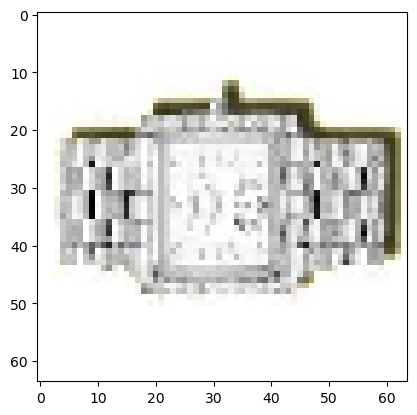

In [18]:
n = 1000
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])